### 1) Import required packages 

In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

### 2) Load Datasets

In [2]:
tv_data = pd.read_csv('TV Marketing.csv')
tv_data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


### 3) Exploring and visualising the data 

In [3]:
# Display information
tv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [4]:
#for some statistical information about the dataframe.
tv_data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [5]:
# Check the shape of the DataFrame (rows, columns)
tv_data.shape

(200, 2)

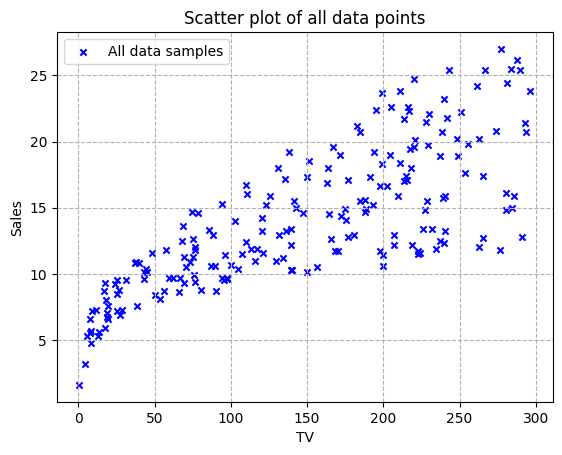

In [6]:
# Visualise the relationship between the features and the response using scatterplots
fig, ax = plt.subplots(nrows=1, ncols=1)
tv_data.plot(x='TV', y='Sales', 
             kind='scatter', ax=ax, 
             marker='x', color='b', label="All data samples")
ax.set_title("Scatter plot of all data points")
plt.legend()
plt.grid(ls='--')

### 4) Model Building

#### Using Scikit learn library builtin function 

In [7]:
# Forming the supervised training data
X_trn, y_trn = tv_data['TV'], tv_data['Sales']

#### Splitting Data into Training and Testing Sets 

In [8]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trn, y_trn,  test_size=0.3, random_state = 1)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

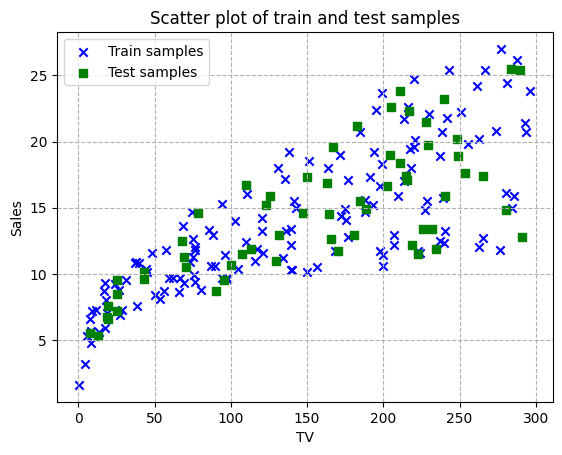

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(X_train, y_train, marker="x", color="b", label="Train samples")
ax.scatter(X_test, y_test, marker="s", color="g", label="Test samples")

ax.set_title("Scatter plot of train and test samples")
ax.set_xlabel("TV")
ax.set_ylabel("Sales")
plt.legend()
plt.grid(ls='--')

In [10]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (140, 1)
y_train: (140,)
X_test: (60, 1)
y_test: (60,)


In [11]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### Model fitting

In [12]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Extracting coefficient 

In [13]:
# Print the intercept and coefficients
print("Intercept",lr.intercept_)
print("Slope",lr.coef_)

Intercept 6.923519536059553
Slope [0.04812204]


#### Predicting using fitted model 

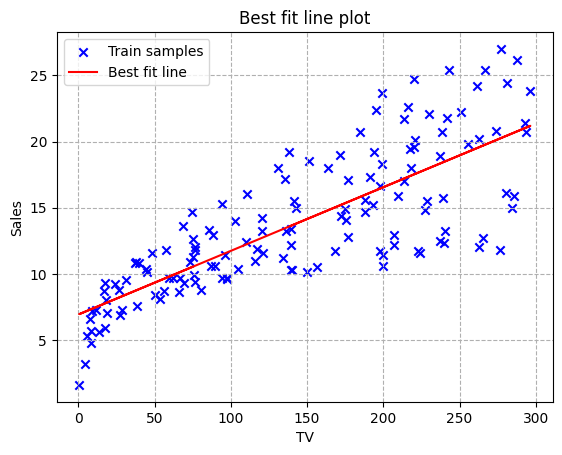

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X_train, y_train, marker="x", color="b", label="Train samples")
ax.plot(X_train, lr.predict(X_train), color='red', label="Best fit line")
ax.set_xlabel("TV")
ax.set_ylabel("Sales")
ax.set_title("Best fit line plot")
plt.legend()
plt.grid(ls='--')

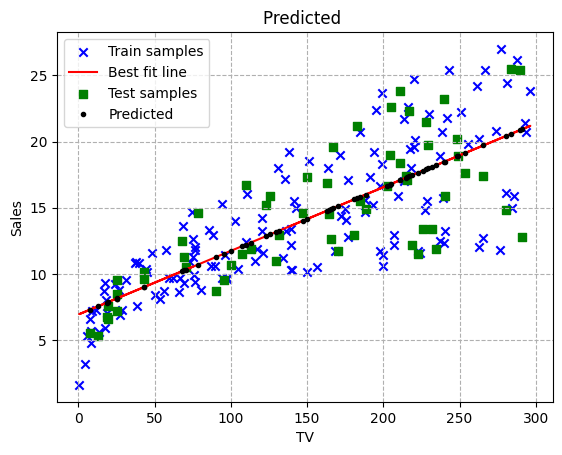

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X_train, y_train, marker="x", color="b", label="Train samples")
ax.plot(X_train, lr.predict(X_train), color='red', label="Best fit line")

ax.scatter(X_test, y_test, marker="s", color="g", label="Test samples")
ax.plot(X_test, lr.predict(X_test), ".", color='black', label="Predicted")

ax.set_xlabel("TV")
ax.set_ylabel("Sales")
ax.set_title("Predicted ")

plt.legend()
plt.grid(ls='--')


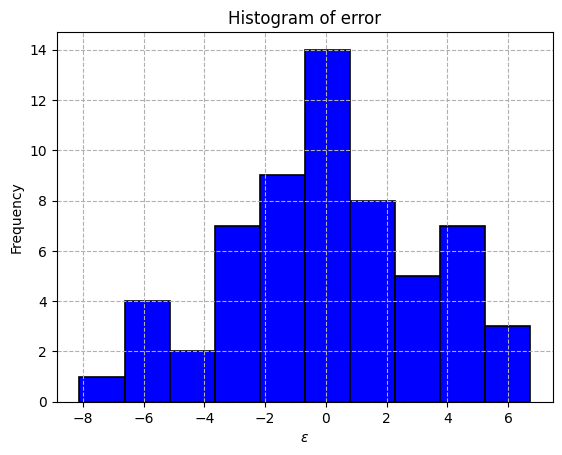

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.hist(y_test-lr.predict(X_test), bins=10, color="blue", edgecolor='black', linewidth=1.2)

ax.set_xlabel("$\epsilon$")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of error")

plt.grid(ls='--')

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, lr.predict(X_test))
r_squared = r2_score(y_test, lr.predict(X_test))

In [18]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', r_squared)

Mean_Squared_Error : 10.571057434656955
r_square_value : 0.575061860494331


#### Visualizing the coefficients 

In [19]:
X=X_train
y=y_train.values
print(X.shape)
print(y.shape)

(140, 1)
(140,)


In [20]:
# Create grid coordinates for plotting
beta_0 = np.linspace(lr.intercept_-2, lr.intercept_+2, 50)
beta_1 = np.linspace(lr.coef_-0.02, lr.coef_+0.02, 50)
xx, yy = np.meshgrid(beta_0, beta_1, indexing='xy')
Z = np.zeros((beta_0.size, beta_1.size))

# Calculate Z-values (RSS) based on grid of coefficients
# actual - predicted , (y-(b+mx))
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()

# Minimized RSS
min_RSS = r'b, m for minimized RSS'
min_rss = np.sum((lr.intercept_+lr.coef_*X - y.reshape(-1,1))**2)
min_rss

np.sum((lr.intercept_+lr.coef_*X - y.reshape(-1,1))**2)

1468.8755634091915

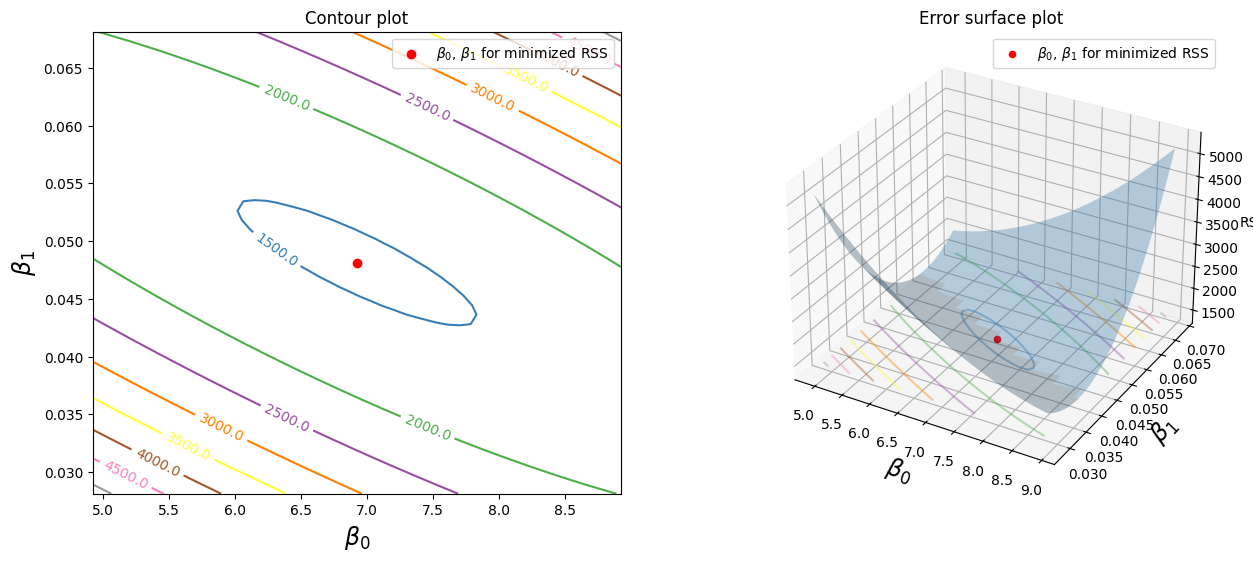

In [21]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1)
ax1.scatter(lr.intercept_, lr.coef_[0], c='r', label=r'$\beta_0$, $\beta_1$ for minimized RSS')
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_title("Contour plot")

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1, alpha=0.4)
ax2.scatter3D(lr.intercept_, lr.coef_[0], min_rss, c='r', label=r'$\beta_0$, $\beta_1$ for minimized RSS')
ax2.set_zlabel('RSS')
ax2.set_title("Error surface plot")

# Settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.legend()